# Step -1 : Pick K=3 points as centroids. Select 1st centroid randomly and other 2 centroids using Probabilistic Proportion approach.


In [23]:
import random 

#Original Data Points
data_points = []

for i in range(0,200000):
    d = round(random.random(),3)
    data_points.append(d)    
#print(data_points)

#Selecting k(three) random centroids
list1 = data_points

#Select first centroid c1
c1 = random.choice(list1)
list1.remove(c1)

In [24]:
#Select second centroid c2 
list2 = []
sumOfAll = sum(list1) 
dict1 = {}

for item in list1:        
        distance = (item - c1)**2
        distance = round(distance/sumOfAll,5)
        list2.append(distance)
        
for i in range(0,len(list2)):
    dict1[i] = list2[i]

list2.sort()

for x,y in dict1.items():
    if list2[-1] == y:
        c2 = list1[x]

#print(list1,list2,dict1,c2,c1,sep='\n')
list1.remove(c2)  

In [25]:
#Select third centroid c3
sumOfAll = sum(list1) 
list3 = []
dict2 = {}
for item in list1:
        distance1 = (item - c1)**2               
        distance2 = (item - c2)**2
        
        if distance1>distance2:
            distance1 = round(distance1/sumOfAll,5)
            list3.append(distance1)
        else:
            distance2 = round(distance2/sumOfAll,5)
            list3.append(distance2)

for i in range(0,len(list3)):
    dict2[i] = list3[i]

list3.sort()

for x,y in dict2.items():
    if list3[-1] == y:
        c3 = list1[x]

print(c1,c2,c3,sep='\n')
list1.remove(c3)

0.182
0.923
0.192


# Step-2 : For each x data point, calculate the distance from each centroid and assign it to nearest centroid.

In [26]:
#defining sets/clusters based on the nearest centroids 

def nearest_centroid(list1,c1,c2,c3):
    set1 = []
    set2 = []
    set3 = []
    for item in list1:
        dist1 = (c1 - item)**2 #using squares of data to get modules
        dist2 = (c2 - item)**2 #using squares of data to get modules
        dist3 = (c3 - item)**2 #using squares of data to get modules       
              
        if dist1<dist2 and dist1<dist3:
            set1.append(item)
        elif dist2<dist1 and dist2<dist3:
            set2.append(item)
        else:
            set3.append(item) 
        
    return set1,set2,set3

# Step-3 : Find each centroid for each cluster by taking their sample average value

In [27]:
#to create new centroids from the clusters using average values of points inside the clusters
def new_centroid(cluster):
    if len(cluster) == 0:
        length = 1
    else:
        length = len(cluster) 
    
    sum_ele = sum(cluster)
    
    new_c = sum_ele/length   
    return new_c

# Step-4 : Compare new centroid with old centroid, if distance is negligible break the loop or reperform step2.

In [28]:
#to compare different centroids values
def compare_newC_with_OldC(c1,c2,c3,set1,set2,set3):

    old_c1 = c1
    new_c1 = new_centroid(set1) 

    old_c2 = c2
    new_c2 = new_centroid(set2) 

    old_c3 = c3
    new_c3 = new_centroid(set3)     

    if old_c1<=new_c1:
        new_c1 = old_c1

    if old_c2<=new_c2:
        new_c2 = old_c2

    if old_c3<=new_c3:
        new_c3 = old_c3

    return new_c1,new_c2,new_c3

print('old_c1 = {} old_c2 = {} old_c3 ={}'.format(c1,c2,c3))

while 1:
    #print('old_c1 = {} old_c2 = {} old_c3 ={}'.format(c1,c2,c3))
    tuple0 = nearest_centroid(list1,c1,c2,c3)
    set1 = tuple0[0]
    set2 = tuple0[1]
    set3 = tuple0[2]
    
    tuple1 = compare_newC_with_OldC(c1,c2,c3,set1,set2,set3)
    new_c1 = round(tuple1[0],4)
    new_c2 = round(tuple1[1],4)
    new_c3 = round(tuple1[2],4)
    
    if c1==new_c1 and c2==new_c2 and c3==new_c3:
        break
    else:
        c1 = new_c1
        c2 = new_c2
        c3 = new_c3  
    print('new_c1 = {} new_c2 = {} new_c3 ={}'.format(new_c1,new_c2,new_c3))
        
print('new_c1 = {} new_c2 = {} new_c3 ={}'.format(new_c1,new_c2,new_c3))

old_c1 = 0.182 old_c2 = 0.923 old_c3 =0.192
new_c1 = 0.0932 new_c2 = 0.7787 new_c3 =0.192
new_c1 = 0.0711 new_c2 = 0.743 new_c3 =0.192
new_c1 = 0.0655 new_c2 = 0.7341 new_c3 =0.192
new_c1 = 0.0638 new_c2 = 0.732 new_c3 =0.192
new_c1 = 0.0633 new_c2 = 0.731 new_c3 =0.192
new_c1 = 0.0633 new_c2 = 0.731 new_c3 =0.192


In [29]:
print(len(set1),len(set2),len(set3),sep='\n')

25563
107607
66827


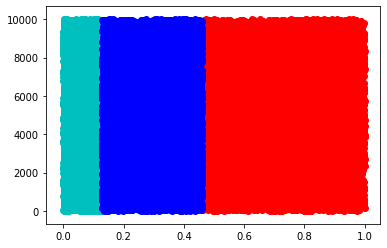

In [30]:
import matplotlib.pyplot as plt
y = []
for i in range(0,10000):
    y.append(i)

y.sort()

plt.scatter(set1[0:10000],y,color = 'c' )
plt.scatter(set2[0:10000],y,color = 'r' )
plt.scatter(set3[0:10000],y,color = 'b' )
plt.show()